# Code Along: Chi-Square Test

Source: "Practical Statistics for Data Scientists" (124 - 126).

## 1. Create data frame

In [1]:
import pandas as pd

# observed results
Click = [14, 8, 12]
No_click = [986, 992, 988]

# Try changing the amount of clicks
# Click = [14, 14, 14]
# Click = [0, 100, 980]
# No_click = [986, 986, 986]

observed = pd.DataFrame([Click, No_click],
                           columns = ["A", "B", "C"],
                           index = ["Click", "No-click"])
observed

,A,B,C
Click,14,8,12
No-click,986,992,988


In [2]:
14/986

0.014198782961460446

In [3]:
observed.shape[1]

3

## 2. Expected results

The results we would have if the Null Hypothesis is true.

In [4]:
observed

,A,B,C
Click,14,8,12
No-click,986,992,988


In [5]:
# expected results
exp_clicks = sum(Click)/observed.shape[1]
exp_no_click = sum(No_click)/observed.shape[1]

Click = [14, 8, 12]
No_click = [986, 992, 988]
expected = pd.DataFrame([[exp_clicks, exp_clicks, exp_clicks], [exp_no_click, exp_no_click, exp_no_click]],
                           columns = ["A", "B", "C"],
                           index = ["Click", "No-click"])
expected

,A,B,C
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [6]:
observed - expected

,A,B,C
Click,2.666667,-3.333333,0.666667
No-click,-2.666667,3.333333,-0.666667


## 3. Pearson Residual & Chi-square statistic

The Pearson residual measures the extent to which the actual counts differ from 

1.   List item
2.   List item

the expected counts.

In [7]:
# Pearson Residual
import numpy as np
def pearson_residuals(obs, exp):
    return (obs - exp) / (np.sqrt(exp))

R = pearson_residuals(observed, expected)
R

,A,B,C
Click,0.792118,-0.990148,0.198030
No-click,-0.084809,0.106012,-0.021202


The **chi-square statistic** is the sum of the squared Pearson residuals

In [8]:
R.A.sum()

0.7073086743038447

In [9]:
R = R**2
chi2observed = R.A.sum() + R.B.sum() + R.C.sum()
chi2observed

1.6659394708658917

What we want to know is... could this divergence from the expected counts (expressed by the `1.666` chi2 statistic we found) happen by chance? Or would it be too unlikely?

## 4. Chi-Square Test - Resampling approach

(Permutations, the hacker way)

In [10]:
Click

[14, 8, 12]

In [11]:
No_click

[986, 992, 988]

In [12]:
import random
# create a "box" with 34 cliks (1) and 2966 no-clicks (0)
box = [1] * 34
box.extend([0]*2966)
random.shuffle(box)
len(box)

3000

In [13]:
print(box)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:
# extract 3 samples of 1000, count the clicks and no-clicks on each
sample_clicks = [sum(random.sample(box, 1000)),
                 sum(random.sample(box, 1000)),
                 sum(random.sample(box, 1000))]

sample_noclicks = [1000 - n for n in sample_clicks]

print(sample_clicks)
print(sample_noclicks)

[15, 15, 15]
[985, 985, 985]


In [15]:
observed_2 = pd.DataFrame([sample_clicks, sample_noclicks],
                        columns = ["A", "B", "C"],
                        index = ["Click", "No-click"])
observed_2

,A,B,C
Click,15,15,15
No-click,985,985,985


In [16]:
R = pearson_residuals(observed_2, expected)
R = R**2
R.A.sum() + R.B.sum() + R.C.sum()

3.5996192138352288

Whole resampling process, many times. Count how many times the chi score is higher than the observed chi score. The proportion of times this happens is our p-value.

In [17]:
chi_scores = []

# expected results
expected = pd.DataFrame([[34/3, 34/3, 34/3], [1000 - 34/3, 1000 - 34/3, 1000 - 34/3]],
                           columns = ["A", "B", "C"],
                           index = ["Click", "No-click"])

for i in range(10000):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]

    sample_noclicks = [1000 - n for n in sample_clicks]

    observed_ = pd.DataFrame([sample_clicks, sample_noclicks],
                            columns = ["A", "B", "C"],
                            index = ["Click", "No-click"])
    
    R = pearson_residuals(observed_, expected)
    R = R**2

    chi_scores.append(R.A.sum() + R.B.sum() + R.C.sum())

We can check how the distribution of the chi scores from the simulations approaches a chi-square distribution with degrees_of_freedom = (rows - 1) * (columns -1).

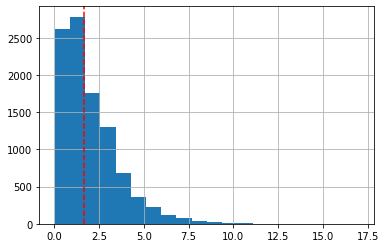

In [21]:
import matplotlib.pyplot as plt
pd.Series(chi_scores).hist(bins=20);
plt.axvline(chi2observed, color="red", linestyle="--");

The p-value is the proportion of the area to the left of the observed chi-square score (`1.67`):

In [20]:
chi2observed

1.6659394708658917

In [22]:
sum(chi_scores >= chi2observed)

4901

In [23]:
len(chi_scores)

10000

In [24]:
resampled_p_value = sum(chi_scores >= chi2observed) / len(chi_scores)
resampled_p_value

0.4901

In a world where the null hypothesis is true, there is around 49% chance of getting a result as extreme or more than the observed.

## 5. Theoretical approach

(Scipy)

In [18]:
observed

,A,B,C
Click,14,8,12
No-click,986,992,988


In [19]:
from scipy import stats
chisq, pvalue, df, expected = stats.chi2_contingency(observed)
pvalue

0.4347562562343731

In [25]:
df

2

In [26]:
expected

array([[ 11.33333333,  11.33333333,  11.33333333],
       [988.66666667, 988.66666667, 988.66666667]])

In [27]:
chisq

1.6659394708658917

## 6. Exercise:

You have tested 2 variants A and B of the "SHOP NOW" button on Eniac's website. 



After the experiment is complete, these are the results:

- Variant A: 134 clicks, 8391 visits.
- Variant B: 102 clicks, 4512 visits.



In [40]:
import pandas as pd

# observed results
clicks = [134,8391]
visits = [102,4512]


observed1= pd.DataFrame([clicks, visits],
                           columns = ["A", "B"],
                           index = ["clicks", "visits"])
observed1

,A,B
clicks,134,8391
visits,102,4512


In [56]:
observed1.shape[1]

2

In [44]:
# expected results
exp_clicks1 = sum(clicks)/observed1.shape[1]
exp_visits1= sum(visits)/observed1.shape[1]

clicks= [134, 8391]
visits= [102, 4512]
expected1= pd.DataFrame([[exp_clicks1, exp_clicks1], [exp_visits1, exp_visits1]],
                           columns = ["A", "B"],
                           index = ["clicks", "visits"])
expected1

,A,B
clicks,4262.5,4262.5
visits,2307.0,2307.0


In [39]:
observed1 - expected1

,A,B
Clicks,-4128.5,4128.5
Visits,-2205.0,2205.0


In [45]:
# Pearson Residual
import numpy as np
def pearson_residuals(obs, exp):
    return (obs - exp) / (np.sqrt(exp))

R = pearson_residuals(observed1, expected1)
R

,A,B
clicks,-63.235374,63.235374
visits,-45.907622,45.907622


In [46]:
R.A.sum()

-109.14299615680079

In [57]:
R = R**2
chi2observed1 = R.A.sum() + R.B.sum()
chi2observed1# wrong go for theoretical approach Swathy

1.3151325417220233e+29

Theoretical approach

In [50]:
observed1

,A,B
clicks,134,8391
visits,102,4512


In [51]:
from scipy import stats
chisq, pvalue, df, expected = stats.chi2_contingency(observed1)
pvalue

0.010379468637043202

In [52]:
df

1

In [53]:
expected1

,A,B
clicks,4262.5,4262.5
visits,2307.0,2307.0


In [58]:
chisq

6.568580797021845